### Introduction: Project Goal
    
The goal of this project is to visualize and find insights from the World Glacier Inventory dataset. 

### Background

### Data and Methodology
This dataset contains the name, location, and other descriptors for over 130k glaciers in the world and the dataset is located here: https://www.kaggle.com/datasets/nsidcorg/glacier-inventory

In [10]:
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("C:/Users/yzhou/Desktop/World Glacier Inventory Data/database.csv", delimiter=',', skiprows=0, low_memory=False) 
df.head()

,Glacier ID,Political Unit,Continent,Basin Code,Location Code,Glacier Code,Glacier Name,Latitude,Longitude,Primary Class,...,Maximum Length,Maximum Length Exposed,Maximum Length Ablation,Mean Depth,Depth Accuracy,Accumulation Orientation,Ablation Orientation,Topographic Map Year,Topographic Map Scale,Photograph Year
0,AF5Q112B0001,AFGHANISTAN,ASIA,Q112,B0,1,NaN,34.672,68.874,9.0,...,1.9,NaN,NaN,NaN,NaN,NE,NE,1959.0,100000.0,NaN
1,AF5Q112B0002,AFGHANISTAN,ASIA,Q112,B0,2,NaN,34.676,68.855,9.0,...,0.8,NaN,NaN,NaN,NaN,NW,NW,1959.0,100000.0,NaN
2,AF5Q112B0003,AFGHANISTAN,ASIA,Q112,B0,3,NaN,34.689,68.854,9.0,...,1.5,NaN,NaN,NaN,NaN,NW,NW,1959.0,100000.0,NaN
3,AF5Q112B0004,AFGHANISTAN,ASIA,Q112,B0,4,NaN,34.707,68.857,9.0,...,1.5,NaN,NaN,NaN,NaN,NE,NE,1959.0,100000.0,NaN
4,AF5Q112B0005,AFGHANISTAN,ASIA,Q112,B0,5,NaN,34.719,68.852,9.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1959.0,100000.0,NaN


In [22]:
print(df.shape)
df.info()

(132890, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132890 entries, 0 to 132889
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Glacier ID                   132890 non-null  object 
 1   Political Unit               132890 non-null  object 
 2   Continent                    132890 non-null  object 
 3   Basin Code                   132890 non-null  object 
 4   Location Code                132890 non-null  object 
 5   Glacier Code                 132890 non-null  object 
 6   Glacier Name                 46751 non-null   object 
 7   Latitude                     132890 non-null  float64
 8   Longitude                    132890 non-null  float64
 9   Primary Class                131406 non-null  float64
 10  Glacier Source               132746 non-null  float64
 11  Basin Count                  15558 non-null   float64
 12  Glacier Form                 131813 non-null 

<AxesSubplot:>

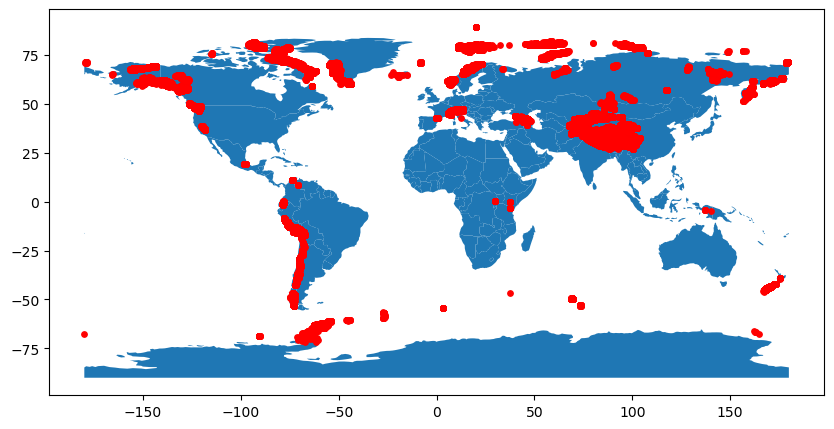

In [23]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

In [24]:
df = df.groupby('Political Unit').count().reset_index()
df = df.sort_values('Glacier ID')
df.head()

,Political Unit,Glacier ID,Continent,Basin Code,Location Code,Glacier Code,Glacier Name,Latitude,Longitude,Primary Class,...,Maximum Length Exposed,Maximum Length Ablation,Mean Depth,Depth Accuracy,Accumulation Orientation,Ablation Orientation,Topographic Map Year,Topographic Map Scale,Photograph Year,geometry
27,SOUTH AFRICA,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
13,GERMANY,5,5,5,5,5,5,5,5,5,...,0,0,0,0,5,5,0,0,0,5
37,ZAIRE,6,6,6,6,6,6,6,6,6,...,0,0,0,0,3,3,6,6,0,6
36,VENEZUELA,6,6,6,6,6,6,6,6,6,...,0,0,0,0,6,6,6,6,6,6
18,INDONESIA,8,8,8,8,8,6,8,8,8,...,0,0,2,0,6,6,6,8,6,8


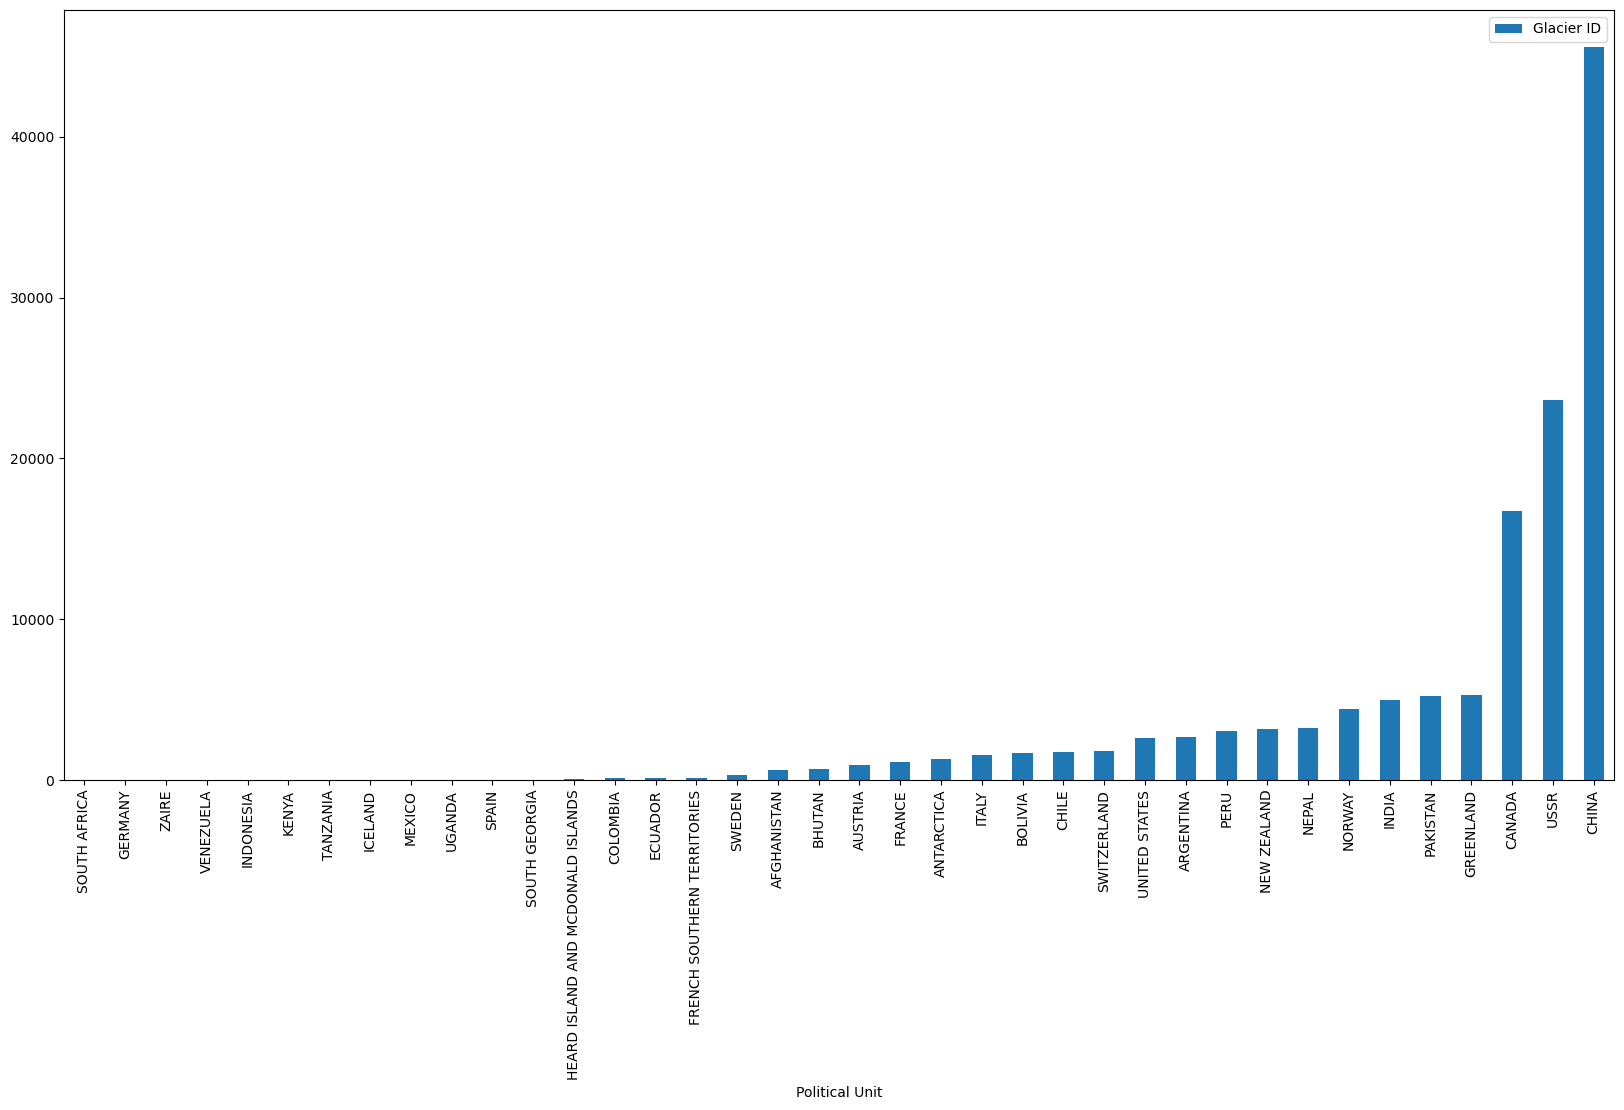

In [25]:
plot_count = df.plot.bar(x='Political Unit', y='Glacier ID', figsize=(20, 10), rot=90)